**Image**

In [8]:
import os
image_path = "image.jpg"
!pip install opencv-python
!pip install matplotlib
!pip install numpy



**Import Libraries**

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**Load Image**

In [11]:

img_color = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)


def show_image(title, img, is_gray=False):
    plt.figure(figsize=(4, 4))
    if is_gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


**Task 1 – Intensity Reduction**

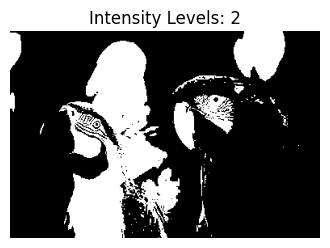

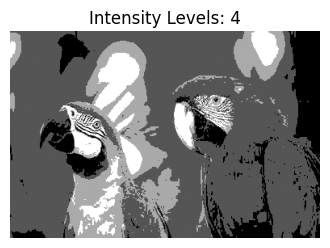

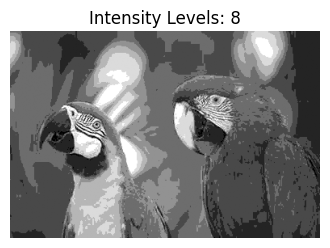

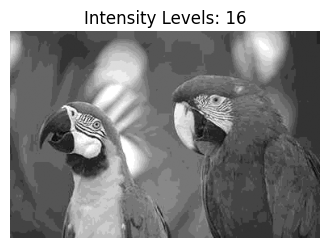

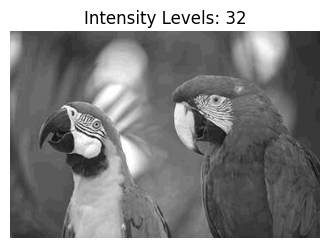

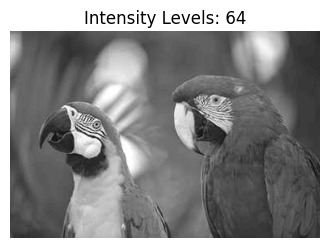

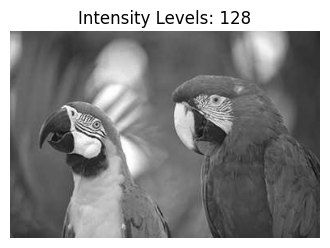

In [12]:
def reduce_intensity_levels(img, levels):
    factor = 256 // levels
    reduced = (img // factor) * factor
    return reduced

intensity_levels = [2, 4, 8, 16, 32, 64, 128]
for l in intensity_levels:
    reduced = reduce_intensity_levels(img_gray, l)
    filename = f"{output_dir}/intensity_levels_{l}.png"
    cv2.imwrite(filename, reduced)
    show_image(f"Intensity Levels: {l}", reduced, is_gray=True)


**Task 2 – Spatial Averaging**

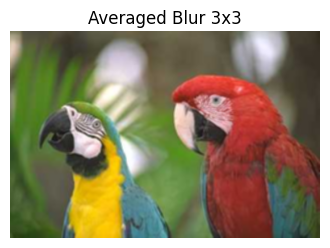

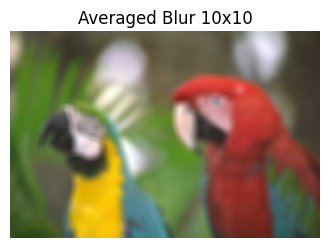

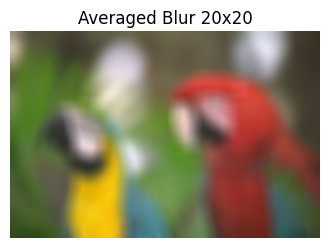

In [13]:
def apply_average_blur(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))

kernel_sizes = [3, 10, 20]
for k in kernel_sizes:
    blurred = apply_average_blur(img_color, k)
    filename = f"{output_dir}/blur_{k}x{k}.png"
    cv2.imwrite(filename, blurred)
    show_image(f"Averaged Blur {k}x{k}", blurred)


**Task 3 – Rotation**

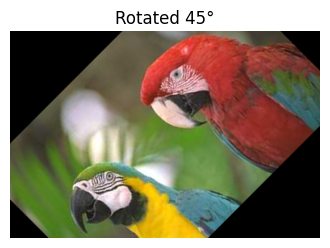

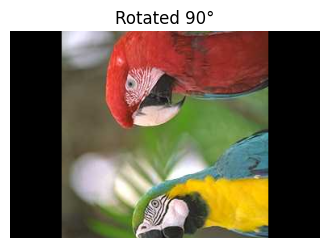

In [14]:
def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

angles = [45, 90]
for a in angles:
    rotated = rotate_image(img_color, a)
    filename = f"{output_dir}/rotated_{a}.png"
    cv2.imwrite(filename, rotated)
    show_image(f"Rotated {a}°", rotated)


**Task 4 – Block-wise Averaging**

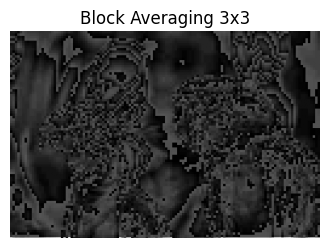

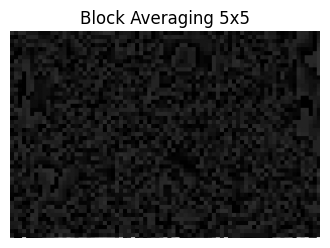

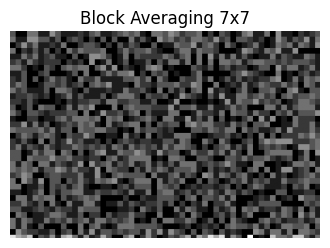

In [15]:
def block_average(img, block_size):
    h, w = img.shape
    out = img.copy()
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            avg = np.mean(block, dtype=np.uint8)
            out[i:i+block_size, j:j+block_size] = avg
    return out

block_sizes = [3, 5, 7]
for b in block_sizes:
    downsampled = block_average(img_gray, b)
    filename = f"{output_dir}/block_{b}x{b}.png"
    cv2.imwrite(filename, downsampled)
    show_image(f"Block Averaging {b}x{b}", downsampled, is_gray=True)
